In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [3]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [5]:
#归一化处理
x_train = x_train/255.0
x_test = x_test/255.0

模型搭建

In [6]:
# 输入层inputx
inputs = Input(shape=(28*28), name='input')
# 隐层dense  
#•第一层隐层设置：神经元个数256，初始化方法为glorot_normal，激活函数为tanh
x = Dense(units=256,activation='tanh',kernel_initializer='glorot_normal', name='dense_0')(inputs)
#•第二层隐层设置：神经元个数128，初始化方法为glorot_normal，激活函数为tanh
x = Dense(units=128, activation='tanh',kernel_initializer='glorot_normal',name='dense_1')(x)
# 输出层
outputs = Dense(units=10, activation='softmax', name='logit')(x)
# 设置模型的inputs和outputsin
model = Model(inputs=inputs, outputs=outputs)
# 设置损失函数loss、优化器optimizer、评价标准metrics
model.compile(loss='sparse_categorical_crossentropy',
              optimizer="sgd", metrics=['accuracy'])

In [7]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
dense_0 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
logit (Dense)                (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


模型训练

In [8]:
history = model.fit(x=x_train, y=y_train, batch_size=32,
                    epochs=150, validation_split=0.2,verbose=2,
                    shuffle=True)

Epoch 1/150
1500/1500 - 3s - loss: 0.6829 - accuracy: 0.7771 - val_loss: 0.5169 - val_accuracy: 0.8221
Epoch 2/150
1500/1500 - 2s - loss: 0.4797 - accuracy: 0.8336 - val_loss: 0.4575 - val_accuracy: 0.8324
Epoch 3/150
1500/1500 - 3s - loss: 0.4397 - accuracy: 0.8448 - val_loss: 0.4299 - val_accuracy: 0.8447
Epoch 4/150
1500/1500 - 2s - loss: 0.4169 - accuracy: 0.8523 - val_loss: 0.4192 - val_accuracy: 0.8451
Epoch 5/150
1500/1500 - 2s - loss: 0.4006 - accuracy: 0.8584 - val_loss: 0.4099 - val_accuracy: 0.8529
Epoch 6/150
1500/1500 - 2s - loss: 0.3884 - accuracy: 0.8624 - val_loss: 0.3975 - val_accuracy: 0.8568
Epoch 7/150
1500/1500 - 3s - loss: 0.3777 - accuracy: 0.8655 - val_loss: 0.3900 - val_accuracy: 0.8591
Epoch 8/150
1500/1500 - 3s - loss: 0.3682 - accuracy: 0.8688 - val_loss: 0.3830 - val_accuracy: 0.8608
Epoch 9/150
1500/1500 - 3s - loss: 0.3600 - accuracy: 0.8722 - val_loss: 0.3792 - val_accuracy: 0.8608
Epoch 10/150
1500/1500 - 3s - loss: 0.3528 - accuracy: 0.8738 - val_loss:

Epoch 80/150
1500/1500 - 6s - loss: 0.1584 - accuracy: 0.9436 - val_loss: 0.3206 - val_accuracy: 0.8905
Epoch 81/150
1500/1500 - 8s - loss: 0.1564 - accuracy: 0.9452 - val_loss: 0.3195 - val_accuracy: 0.8926
Epoch 82/150
1500/1500 - 8s - loss: 0.1554 - accuracy: 0.9451 - val_loss: 0.3188 - val_accuracy: 0.8930
Epoch 83/150
1500/1500 - 15s - loss: 0.1528 - accuracy: 0.9458 - val_loss: 0.3071 - val_accuracy: 0.8951
Epoch 84/150
1500/1500 - 18s - loss: 0.1505 - accuracy: 0.9466 - val_loss: 0.3314 - val_accuracy: 0.8870
Epoch 85/150
1500/1500 - 13s - loss: 0.1493 - accuracy: 0.9477 - val_loss: 0.3101 - val_accuracy: 0.8943
Epoch 86/150
1500/1500 - 15s - loss: 0.1483 - accuracy: 0.9481 - val_loss: 0.3093 - val_accuracy: 0.8938
Epoch 87/150
1500/1500 - 15s - loss: 0.1469 - accuracy: 0.9480 - val_loss: 0.3376 - val_accuracy: 0.8878
Epoch 88/150
1500/1500 - 11s - loss: 0.1450 - accuracy: 0.9491 - val_loss: 0.3393 - val_accuracy: 0.8857
Epoch 89/150
1500/1500 - 15s - loss: 0.1435 - accuracy: 0.

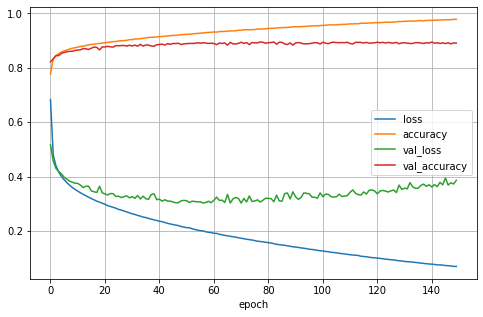

In [10]:
#画图查看history数据的变化趋势
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('epoch')
plt.show()

测试集评估结果

In [11]:
loss, accuracy = model.evaluate(x_test, y_test)
print('loss: ', loss)
print('accuracy: ', accuracy)

313/313 [==============================] - 6s 19ms/step - loss: 0.4124 - accuracy: 0.8832
loss:  0.4123876094818115
accuracy:  0.8831999897956848
